In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

In [2]:
df= pd.read_csv('LAPD_Shooting_incidents.csv')

In [3]:
df.head()

,INCIDENT NUMBER,INCIDENT TYPE,INCIDENT DATE,INCIDENT LOCATION,CITY,STATE,ZIP,REPORTING DISTRICT,GEO_LOCATION,PERSON AGE,...,DECEASED,ON PROBATION,ON PAROLE,UNDER THE INFLUENCE,SUBSTANCE NAME,# OF INVOLVED DEPUTIES,WEAPON INVOLVED CATEGORY,WEAPON INVOLVED CATEGORY DESC,APPROX_LATITUDE,APPROX_LONGITUDE
0,1000472,NON-HIT SHOOTING INCIDENT,12/04/2013 07:35:00 AM,1700 NORTH GRAMERCY PLACE,LOS ANGELES,CA,90028,973,"1700 NORTH GRAMERCY PLACE\nLOS ANGELES, CA 900...",46.0,...,N,Y,N,N,NaN,1,A-4,"FIREARM: Perception shooting, Suspect actions...",34.101714,-118.312239
1,1000380,NON-HIT SHOOTING INCIDENT,02/03/2012 07:10:00 PM,100 EAST CEDAR STREET,COMPTON,CA,90220,2822,"100 EAST CEDAR STREET\nCOMPTON, CA 90220\n(33....",35.0,...,N,Y,Y,Y,ALCOHOL,1,A-3,"FIREARM: Suspect may have been armed, Deputy...",33.901344,-118.224241
2,1000467,HIT SHOOTING INCIDENT,10/29/2013 12:01:00 AM,3900 WEST CENTURY BLVD,INGLEWOOD,CA,90303,399,"3900 WEST CENTURY BLVD\nINGLEWOOD, CA 90303\n(...",49.0,...,Y,Y,Y,N,NaN,2,A-2,"FIREARM: Suspect armed, Suspect fired at deputy",33.945462,-118.342009
3,1000332,NON-HIT SHOOTING INCIDENT,12/01/2010 07:22:00 PM,1700 WILMINGTON BLVD,WILMINGTON,CA,90744,1628,"1700 WILMINGTON BLVD\nWILMINGTON, CA 90744\n(3...",25.0,...,N,Y,Y,N,NaN,1,A-4,"FIREARM: Perception shooting, Suspect actions...",33.796885,-118.275242
4,1000654,HIT SHOOTING INCIDENT,10/19/2015 11:48:00 PM,400 W. 111TH ST.,LOS ANGELES,CA,90061,372,"400 W. 111TH ST.\nLOS ANGELES, CA 90061\n(33.9...",53.0,...,Y,NaN,NaN,NaN,NaN,1,B-2,"WEAPON - OTHER: Suspect armed, Suspect used w...",33.934825,-118.283113


In [4]:
df.isnull().sum()

INCIDENT NUMBER                    0
INCIDENT TYPE                      0
INCIDENT DATE                      0
INCIDENT LOCATION                  0
CITY                               0
STATE                              0
ZIP                                0
REPORTING DISTRICT                 0
GEO_LOCATION                       0
PERSON AGE                         4
PERSON RACE                        0
MENTAL HEALTH CONCERNS             1
CRIMINAL HISTORY                   2
WOUNDED                            4
DECEASED                           4
ON PROBATION                      34
ON PAROLE                         33
UNDER THE INFLUENCE               24
SUBSTANCE NAME                   199
# OF INVOLVED DEPUTIES             0
WEAPON INVOLVED CATEGORY           0
WEAPON INVOLVED CATEGORY DESC      0
APPROX_LATITUDE                    0
APPROX_LONGITUDE                   0
dtype: int64

In [5]:
df.fillna('NULL',inplace =True)

In [6]:
df['INCIDENT DATE']= pd.to_datetime(df['INCIDENT DATE'])

In [7]:
time = df['INCIDENT DATE'].iloc[0]
df['Hour'] = df['INCIDENT DATE'].apply(lambda time: time.hour)
df['Month'] = df['INCIDENT DATE'].apply(lambda time: time.month)
df['Day of Week'] = df['INCIDENT DATE'].apply(lambda time: time.dayofweek)

In [8]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week']= df['Day of Week'].map(dmap)

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

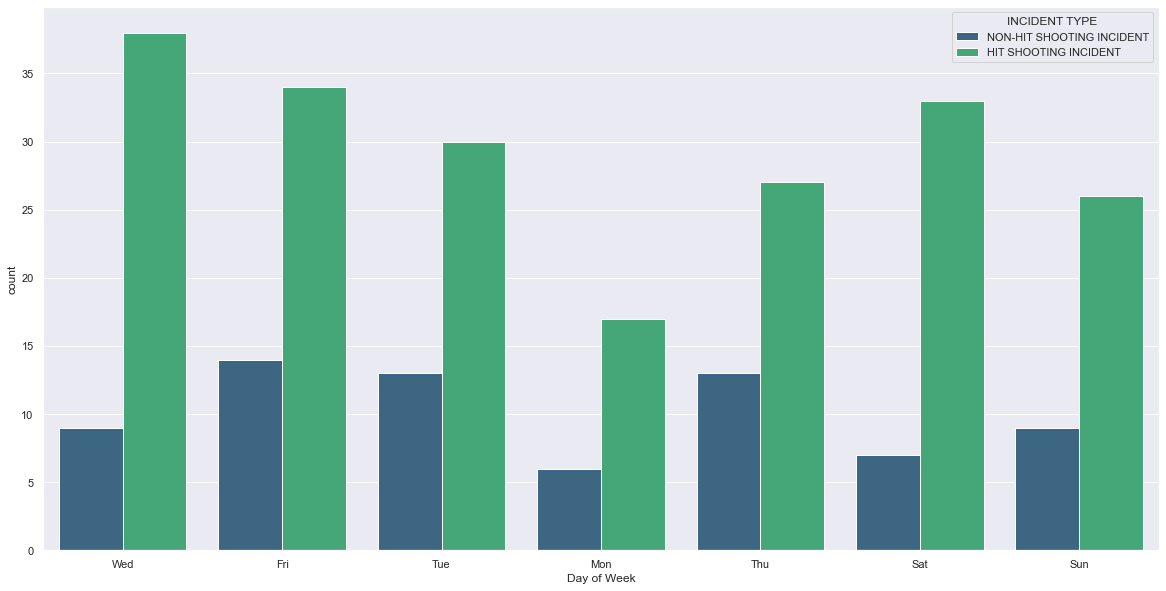

In [9]:
sns.set(rc={'figure.figsize': (20,10)})
sns.countplot(x = 'Day of Week', data = df, hue = 'INCIDENT TYPE', palette ='viridis')

In [10]:
byMonth = df.groupby('Month').count()
byMonth.head()

,INCIDENT NUMBER,INCIDENT TYPE,INCIDENT DATE,INCIDENT LOCATION,CITY,STATE,ZIP,REPORTING DISTRICT,GEO_LOCATION,PERSON AGE,...,ON PAROLE,UNDER THE INFLUENCE,SUBSTANCE NAME,# OF INVOLVED DEPUTIES,WEAPON INVOLVED CATEGORY,WEAPON INVOLVED CATEGORY DESC,APPROX_LATITUDE,APPROX_LONGITUDE,Hour,Day of Week
Month,,,,,,,,,,,,,,,,,,,,,
1,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
2,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
3,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
4,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
5,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28


<AxesSubplot:xlabel='Month'>

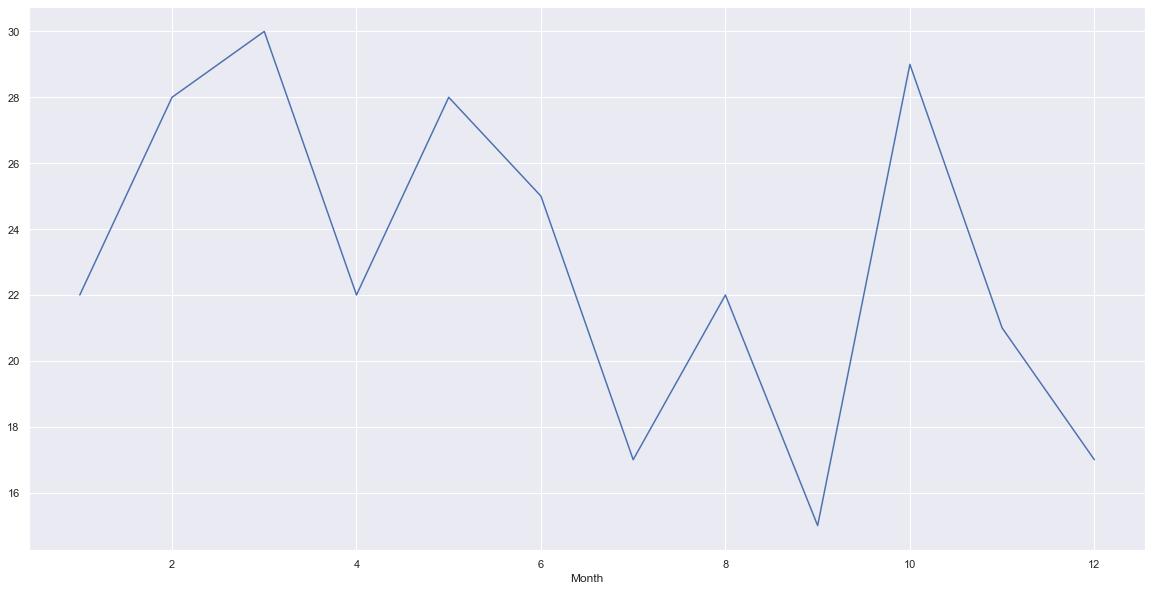

In [11]:
byMonth['INCIDENT TYPE'].plot()

In [12]:
df['Date'] = df['INCIDENT DATE'].apply(lambda p:p.date())

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

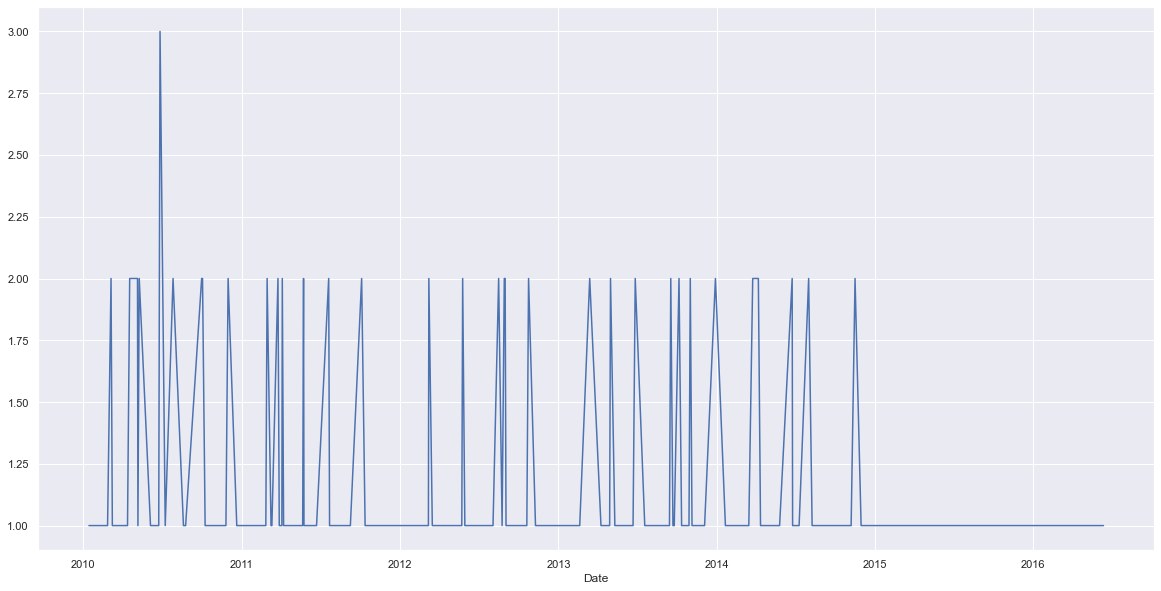

In [13]:
df.groupby('Date').count()['INCIDENT TYPE'].plot()
plt.tight_layout

In [14]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['INCIDENT NUMBER'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,NaN,1.0,2.0,4.0,5.0,NaN,NaN,NaN,3.0,2.0,...,2.0,1.0,NaN,1.0,3.0,1.0,NaN,6.0,2.0,6.0
Mon,1.0,NaN,NaN,1.0,3.0,NaN,NaN,NaN,1.0,2.0,...,NaN,1.0,2.0,NaN,NaN,1.0,2.0,3.0,1.0,2.0
Sat,1.0,4.0,2.0,3.0,3.0,NaN,NaN,NaN,1.0,NaN,...,1.0,1.0,1.0,1.0,2.0,1.0,3.0,5.0,5.0,4.0
Sun,5.0,6.0,4.0,5.0,NaN,NaN,1.0,1.0,1.0,NaN,...,NaN,1.0,3.0,1.0,NaN,1.0,NaN,3.0,NaN,1.0
Thu,1.0,3.0,NaN,1.0,2.0,1.0,NaN,1.0,NaN,1.0,...,3.0,3.0,3.0,4.0,3.0,2.0,3.0,3.0,NaN,NaN


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

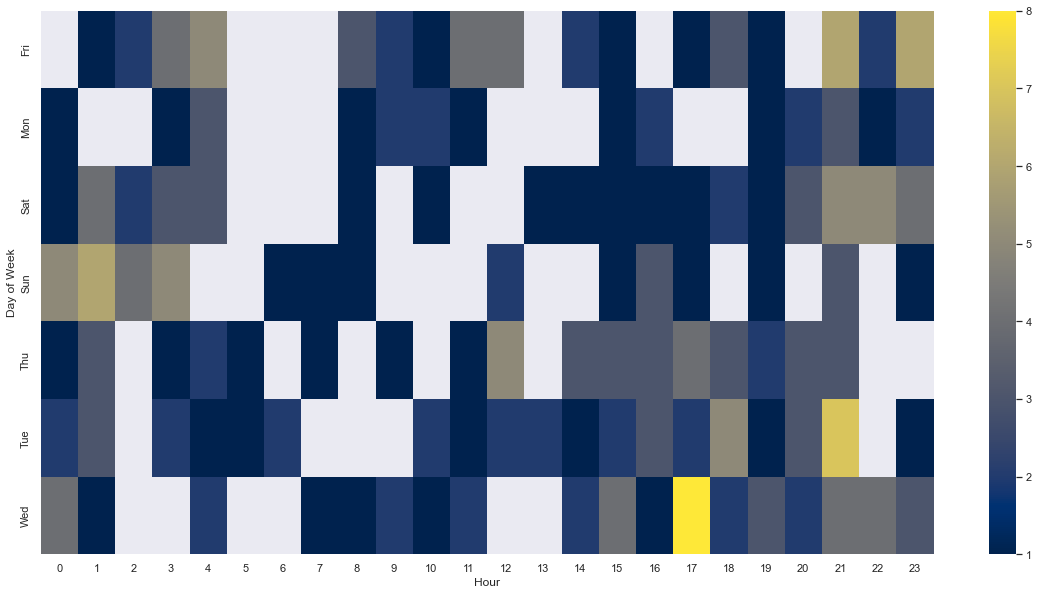

In [15]:
sns.heatmap(dayHour, cmap='cividis')

In [17]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['INCIDENT NUMBER'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,NaN,6.0,4.0,5.0,3.0,1.0,5.0,7.0,2.0,5.0,9.0,1.0
Mon,4.0,2.0,NaN,5.0,3.0,1.0,1.0,2.0,2.0,2.0,1.0,NaN
Sat,4.0,4.0,6.0,2.0,5.0,5.0,1.0,3.0,2.0,4.0,2.0,2.0
Sun,2.0,2.0,2.0,3.0,2.0,4.0,3.0,2.0,2.0,6.0,3.0,4.0
Thu,5.0,5.0,6.0,NaN,4.0,7.0,3.0,3.0,2.0,3.0,1.0,1.0


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

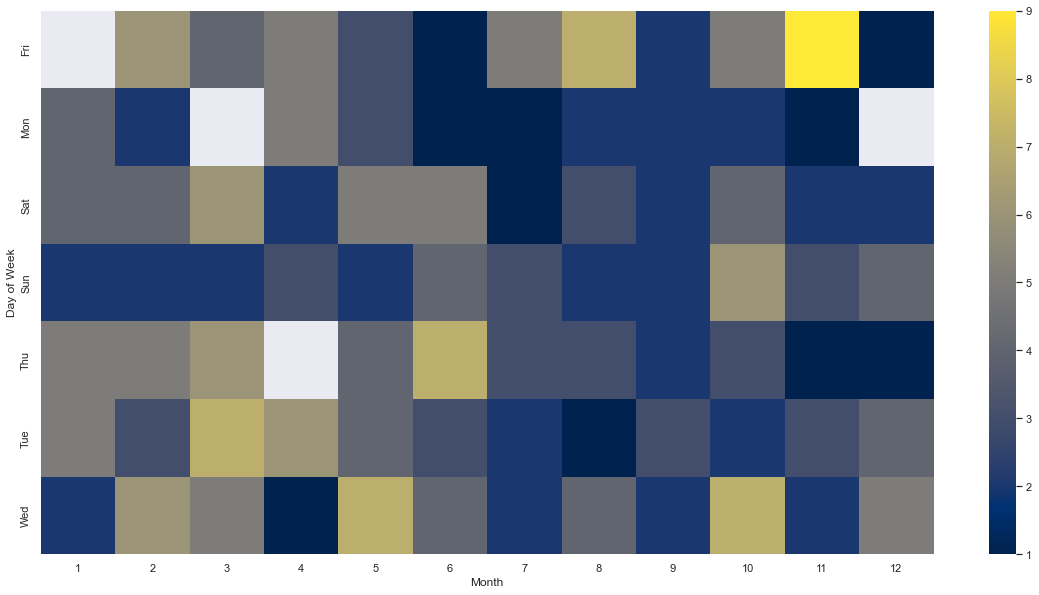

In [18]:
sns.heatmap(dayMonth, cmap='cividis')

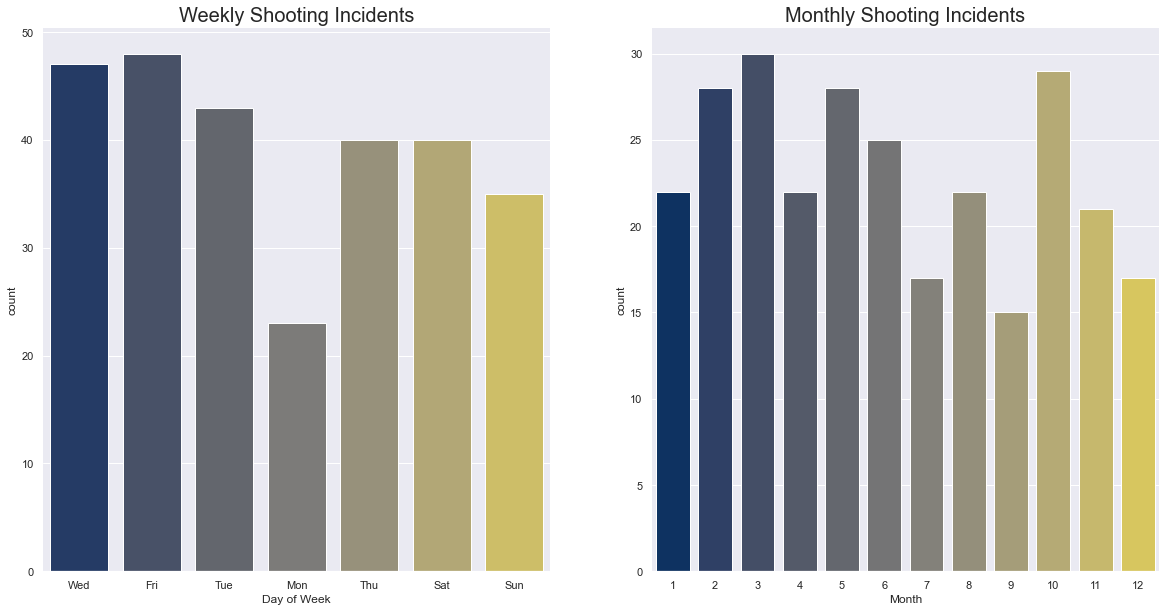

In [20]:
fig, axes = plt.subplots(1,2, figsize = (20,10))
sns.countplot(x='Day of Week', data = df, palette= 'cividis',ax = axes[0])
axes[0].set_title('Weekly Shooting Incidents', size = 20)

sns.countplot(x ='Month', data = df, palette= 'cividis',ax=axes[1])
axes[1].set_title('Monthly Shooting Incidents' ,size = 20)

sns.despine(bottom=False, left= True)


In [21]:
df['Day of Week'].value_counts()\
                .head(20)\
                .to_frame(name = 'Count')\
                .reset_index()\
                .style.background_gradient(cmap='Reds', subset='Count')

,index,Count
0,Fri,48
1,Wed,47
2,Tue,43
3,Thu,40
4,Sat,40
5,Sun,35
6,Mon,23


In [22]:
df['Month'].value_counts()\
                .head(20)\
                .to_frame(name = 'Count')\
                .reset_index()\
                .style.background_gradient(cmap='Reds', subset='Count')

,index,Count
0,3,30
1,10,29
2,2,28
3,5,28
4,6,25
5,1,22
6,8,22
7,4,22
8,11,21
9,12,17


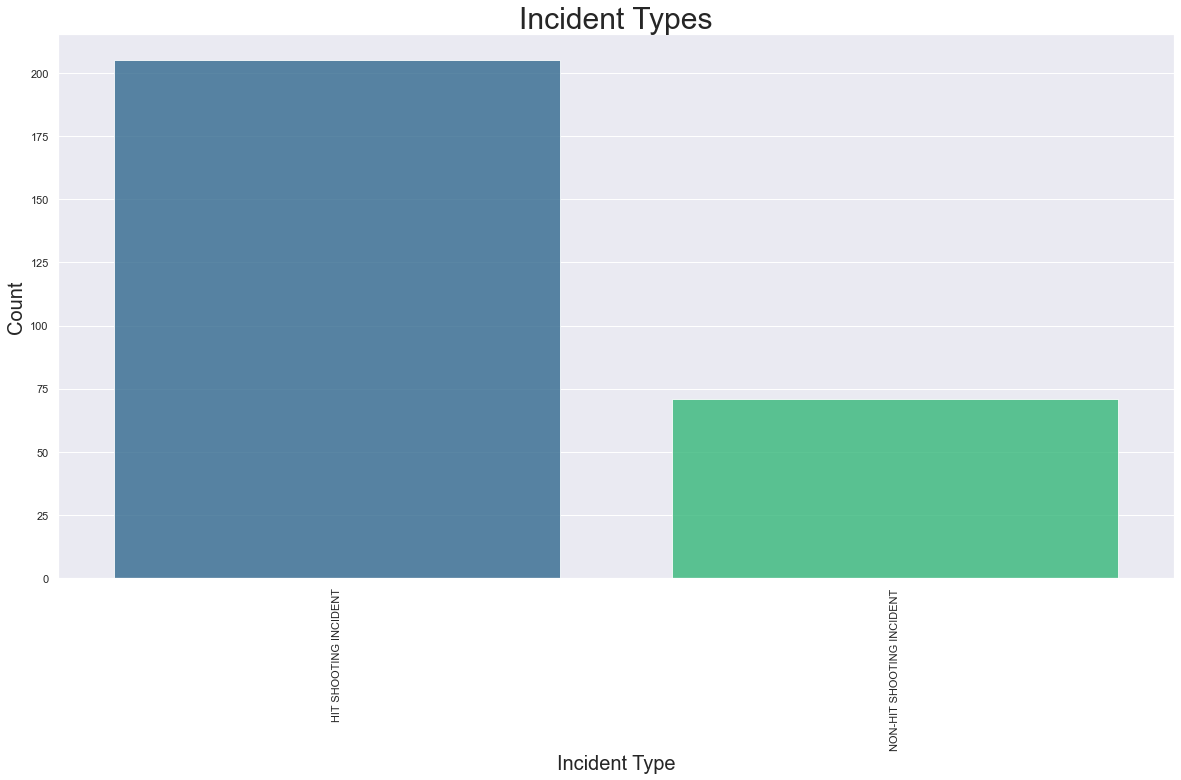

In [24]:
inci_count = df['INCIDENT TYPE'].value_counts()
inci_count = inci_count[:]
plt.figure(figsize=(20,10))
sns.barplot(x = inci_count.index, y = inci_count.values, alpha = 0.8, saturation = 1, palette = 'viridis')
plt.title('Incident Types', fontsize = 30)
plt.xlabel('Incident Type', fontsize =20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

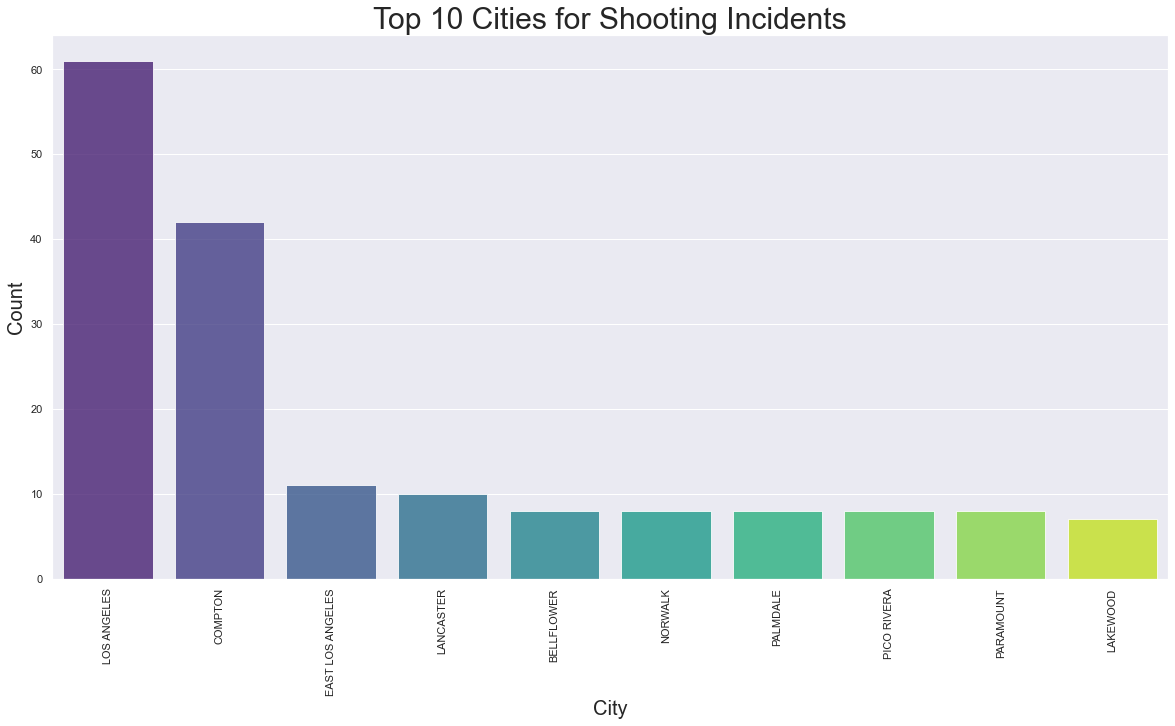

In [25]:
city_count = df['CITY'].value_counts()
city_count = city_count[:10]
plt.figure(figsize=(20,10))
sns.barplot(x=city_count.index, y= city_count.values, alpha = 0.8, saturation = 1, palette = 'viridis')
plt.title('Top 10 Cities for Shooting Incidents', fontsize = 30)
plt.xlabel('City', fontsize =20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [26]:
df['CITY'].value_counts()\
                    .head(20)\
                    .to_frame(name = 'Count')\
                    .reset_index()\
                    .style.background_gradient(cmap='Reds', subset= 'Count')

,index,Count
0,LOS ANGELES,61
1,COMPTON,42
2,EAST LOS ANGELES,11
3,LANCASTER,10
4,BELLFLOWER,8
5,NORWALK,8
6,PALMDALE,8
7,PICO RIVERA,8
8,PARAMOUNT,8
9,LAKEWOOD,7


In [28]:
df['UNDER THE INFLUENCE'].value_counts()\
                    .head(20)\
                    .to_frame(name = 'Count')\
                    .reset_index()\
                    .style.background_gradient(cmap='Reds', subset= 'Count')

,index,Count
0,N,173
1,Y,79
2,NULL,24


C:\Users\micha\Documents\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


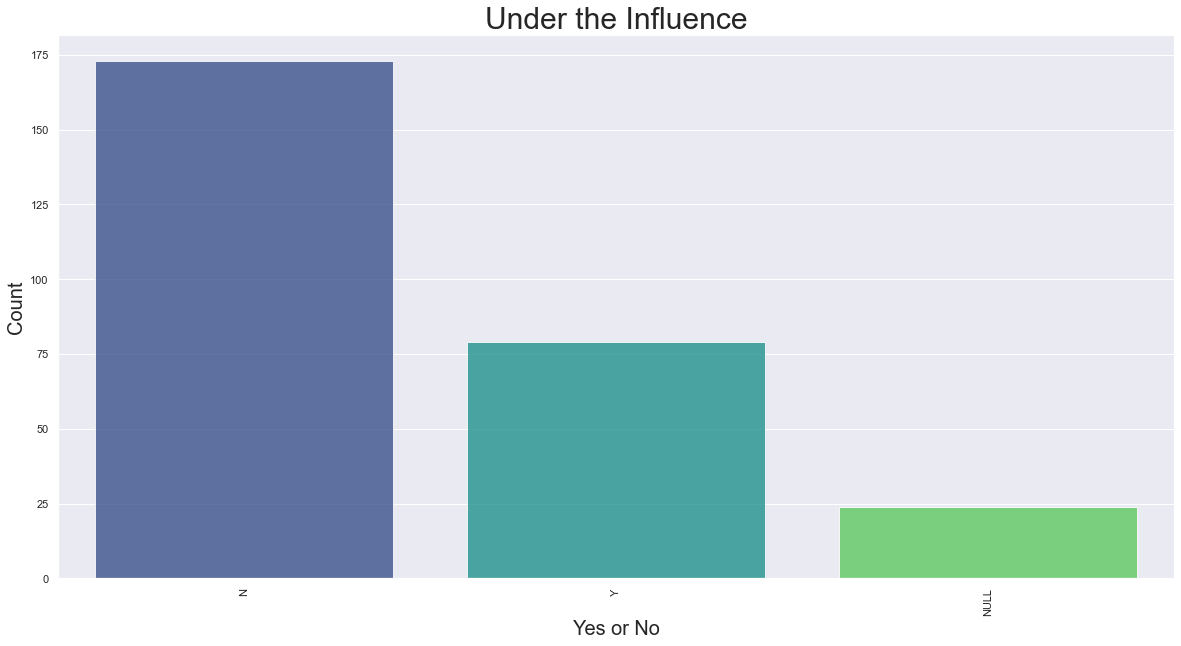

In [29]:
unfl_count = df['UNDER THE INFLUENCE'].value_counts()
unfl_count = unfl_count[:10]
plt.figure(figsize=(20,10))
sns.barplot(unfl_count.index, unfl_count.values, alpha = 0.8, saturation = 1, palette = 'viridis')
plt.title('Under the Influence', fontsize = 30)
plt.xlabel('Yes or No', fontsize =20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

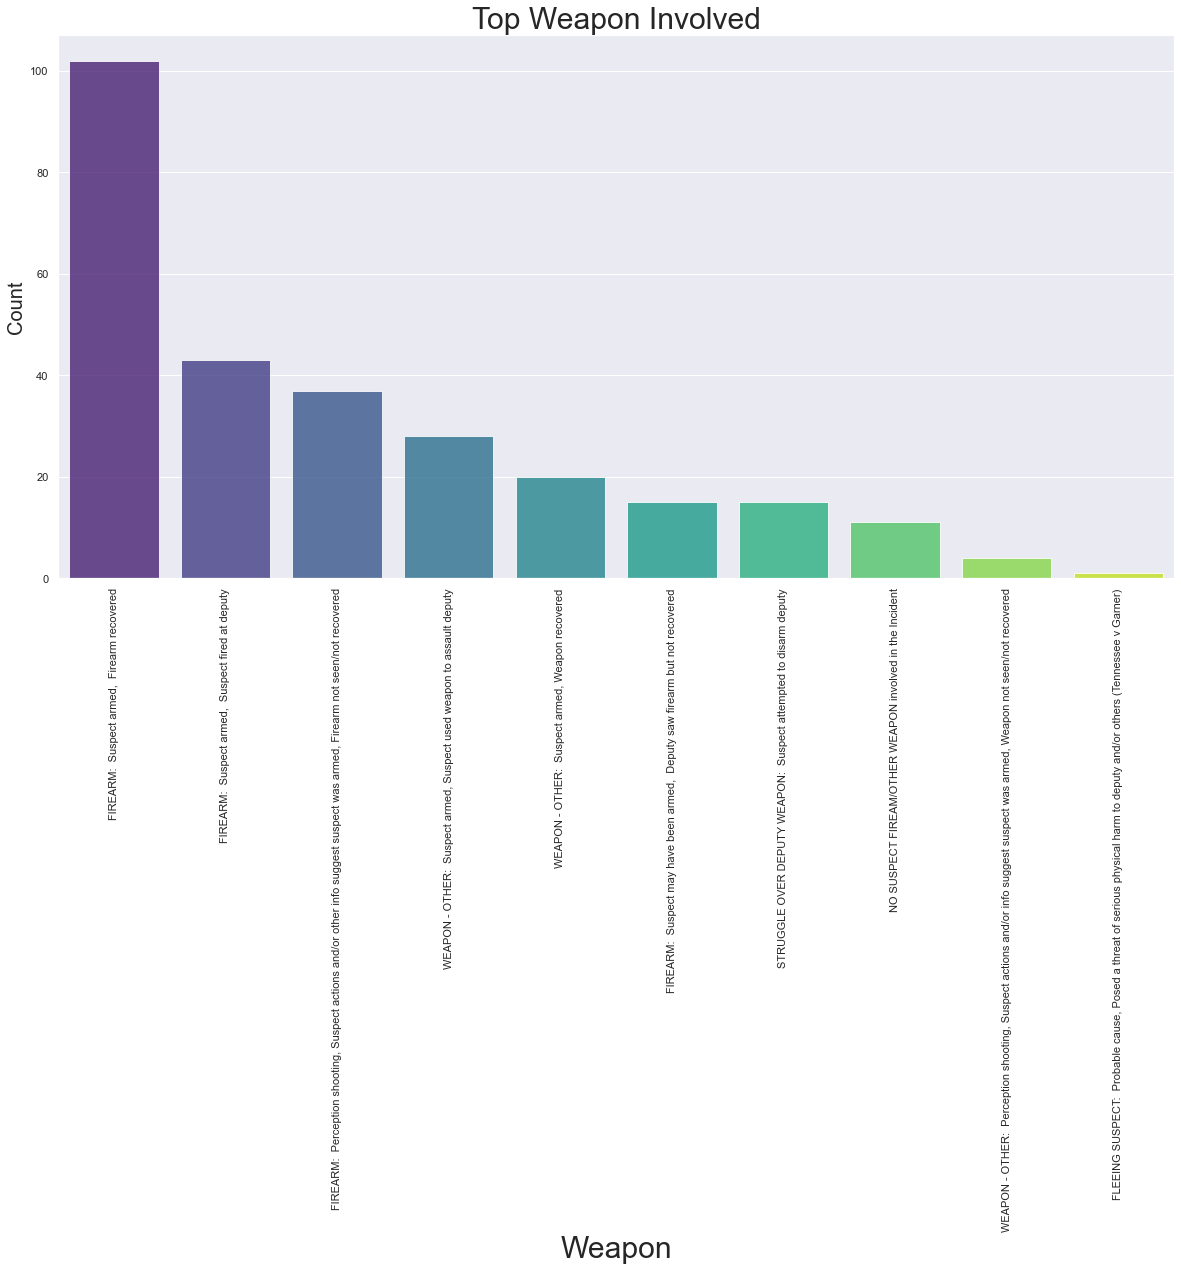

In [31]:
gun_count = df['WEAPON INVOLVED CATEGORY DESC'].value_counts()
gun_count = gun_count[:10]
plt.figure(figsize = (20,10))
sns.barplot(x= gun_count.index, y= gun_count.values, alpha= 0.8, saturation =1, palette='viridis')
plt.title('Top Weapon Involved', fontsize = 30)
plt.xlabel('Weapon', fontsize = 30)
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [32]:
df['WEAPON INVOLVED CATEGORY DESC'].value_counts()\
                    .head(20)\
                    .to_frame(name = 'Count')\
                    .reset_index()\
                    .style.background_gradient(cmap='Reds', subset= 'Count')

,index,Count
0,"FIREARM: Suspect armed, Firearm recovered",102
1,"FIREARM: Suspect armed, Suspect fired at deputy",43
2,"FIREARM: Perception shooting, Suspect actions and/or other info suggest suspect was armed, Firearm not seen/not recovered",37
3,"WEAPON - OTHER: Suspect armed, Suspect used weapon to assault deputy",28
4,"WEAPON - OTHER: Suspect armed, Weapon recovered",20
5,"FIREARM: Suspect may have been armed, Deputy saw firearm but not recovered",15
6,STRUGGLE OVER DEPUTY WEAPON: Suspect attempted to disarm deputy,15
7,NO SUSPECT FIREAM/OTHER WEAPON involved in the Incident,11
8,"WEAPON - OTHER: Perception shooting, Suspect actions and/or info suggest suspect was armed, Weapon not seen/not recovered",4
9,"FLEEING SUSPECT: Probable cause, Posed a threat of serious physical harm to deputy and/or others (Tennessee v Garner)",1


In [33]:
df['DECEASED'].value_counts()\
                    .head()\
                    .to_frame(name = 'Count')\
                    .reset_index()\
                    .style.background_gradient(cmap='Reds', subset= 'Count')

,index,Count
0,N,172
1,Y,100
2,NULL,4


In [34]:
df['SUBSTANCE NAME'].value_counts()\
                    .head(20)\
                    .to_frame(name = 'Count')\
                    .reset_index()\
                    .style.background_gradient(cmap='Reds', subset= 'Count')

,index,Count
0,NULL,199
1,ALCOHOL,25
2,MARIJUANA,14
3,HALLUCINOGEN,10
4,OTHER/UNKNOWN,9
5,CNS STIMULANT,8
6,STIMULANT,4
7,CNS DEPRESSANT,2
8,PCP,2
9,PCP OR KETAMINE,1


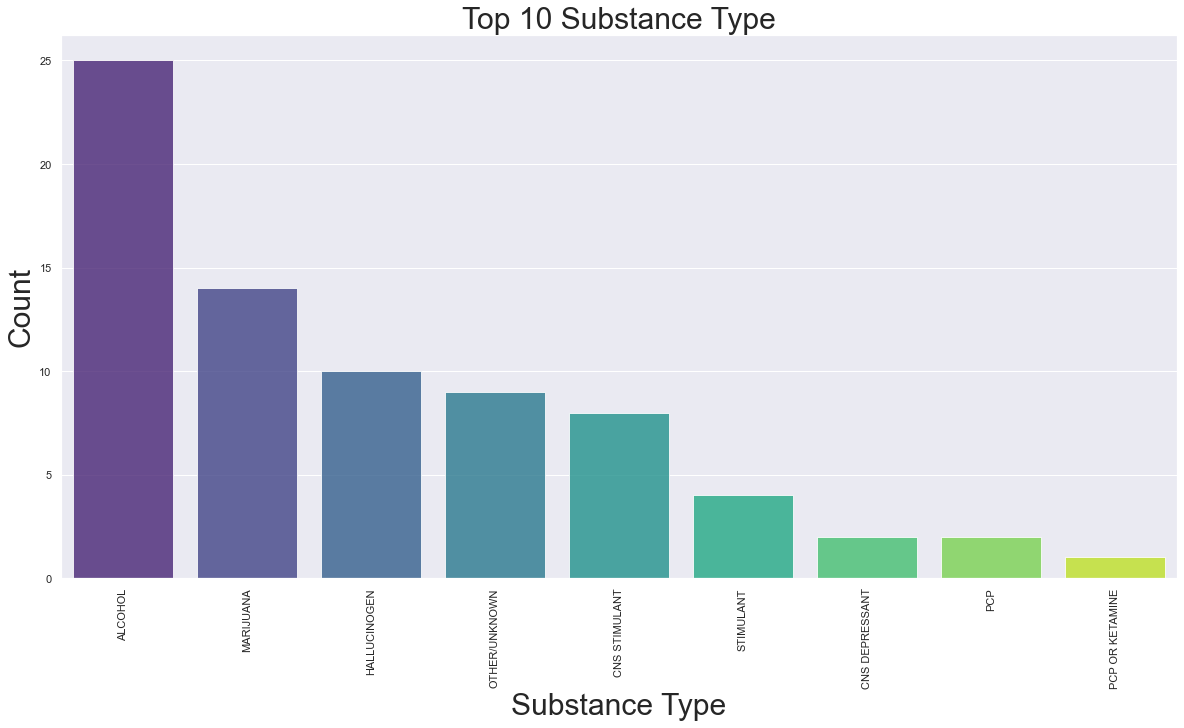

In [36]:
drug_count = df['SUBSTANCE NAME'].value_counts()
drug_count = drug_count[1:10]
sns.barplot(x = drug_count.index, y= drug_count.values, alpha = 0.8, saturation = 1, palette = 'viridis')
plt.title('Top 10 Substance Type', fontsize = 30)
plt.xlabel('Substance Type', fontsize = 30)
plt.ylabel('Count', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

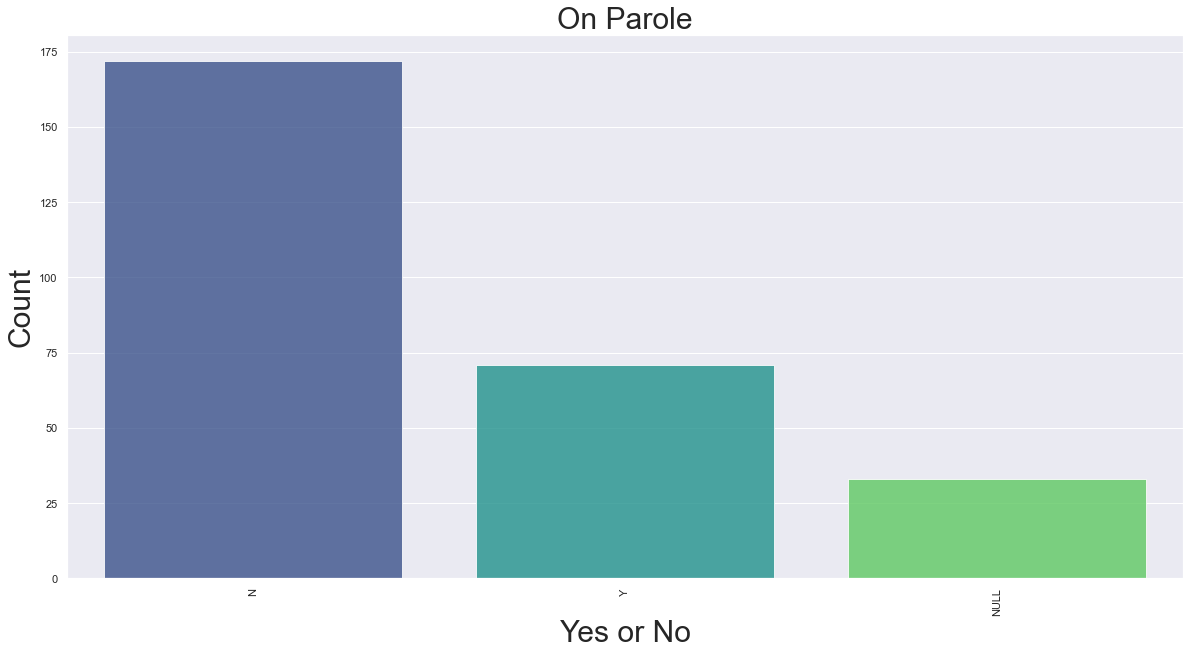

In [37]:
par_count = df['ON PAROLE'].value_counts()
par_count = par_count[:]
sns.barplot(x = par_count.index, y= par_count.values, alpha = 0.8, saturation = 1, palette = 'viridis')
plt.title('On Parole', fontsize = 30)
plt.xlabel('Yes or No', fontsize = 30)
plt.ylabel('Count', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

In [38]:
df['ON PAROLE'].value_counts()\
                .head()\
                .to_frame(name='Count')\
                .reset_index()\
                .style.background_gradient(cmap='Reds', subset='Count')

,index,Count
0,N,172
1,Y,71
2,NULL,33


C:\Users\micha\Documents\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


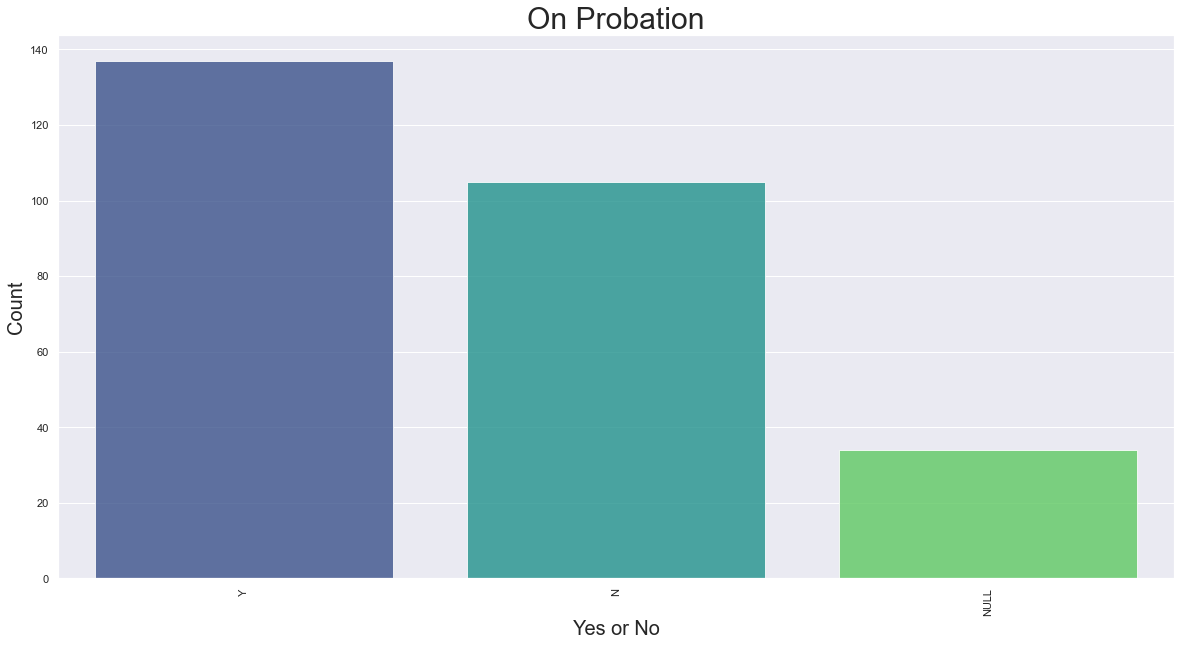

In [39]:
prob_count = df['ON PROBATION'].value_counts()
prob_count = prob_count[:]
plt.figure(figsize=(20,10))
sns.barplot(prob_count.index, prob_count.values, alpha = 0.8, saturation = 1, palette = 'viridis')
plt.title('On Probation', fontsize = 30)
plt.xlabel('Yes or No', fontsize =20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [40]:
df['ON PROBATION'].value_counts()\
                    .head(20)\
                    .to_frame(name = 'Count')\
                    .reset_index()\
                    .style.background_gradient(cmap='Reds', subset= 'Count')

,index,Count
0,Y,137
1,N,105
2,NULL,34


In [41]:
df['PERSON RACE'].value_counts()\
                    .head(20)\
                    .to_frame(name = 'Count')\
                    .reset_index()\
                    .style.background_gradient(cmap='Reds', subset= 'Count')

,index,Count
0,HISPANIC,158
1,BLACK,80
2,WHITE,34
3,ASIAN-PACIFIC-ISL,2
4,OTHER,1
5,UNKNOWN,1


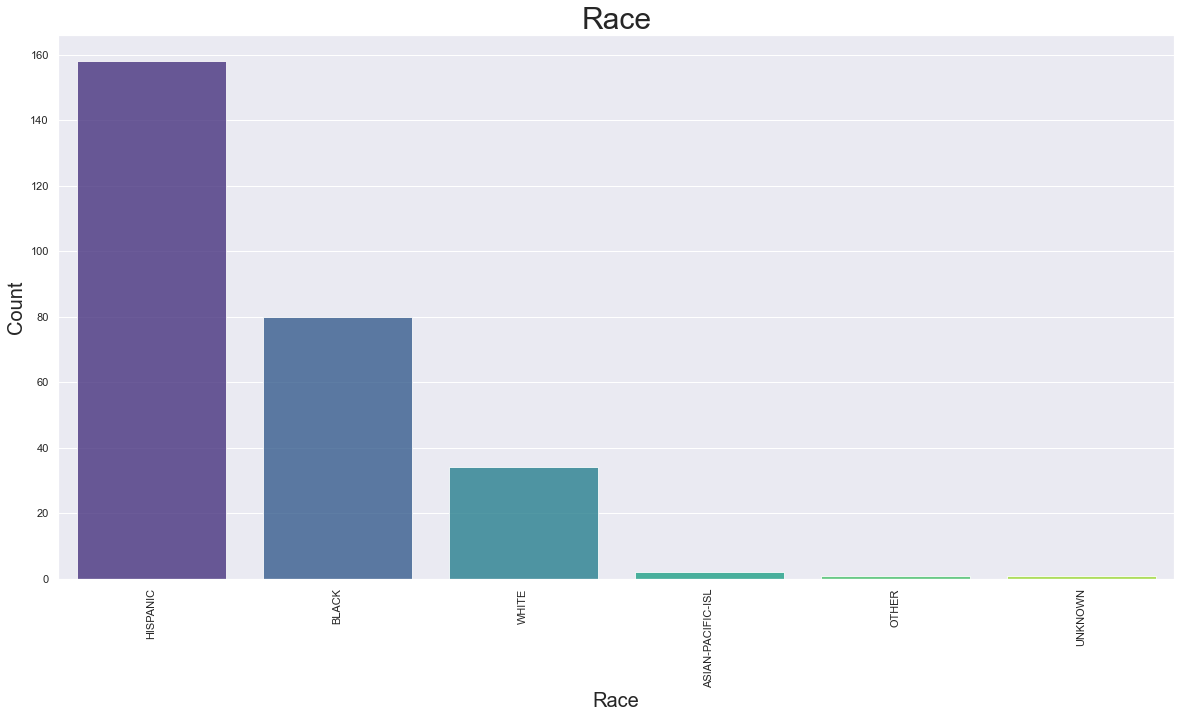

In [44]:
race_count = df['PERSON RACE'].value_counts()
race_count = race_count[:10]
plt.figure(figsize=(20,10))
sns.barplot(x=race_count.index, y=race_count.values, alpha = 0.8, saturation = 1, palette = 'viridis')
plt.title('Race', fontsize = 30)
plt.xlabel('Race', fontsize =20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

C:\Users\micha\Documents\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


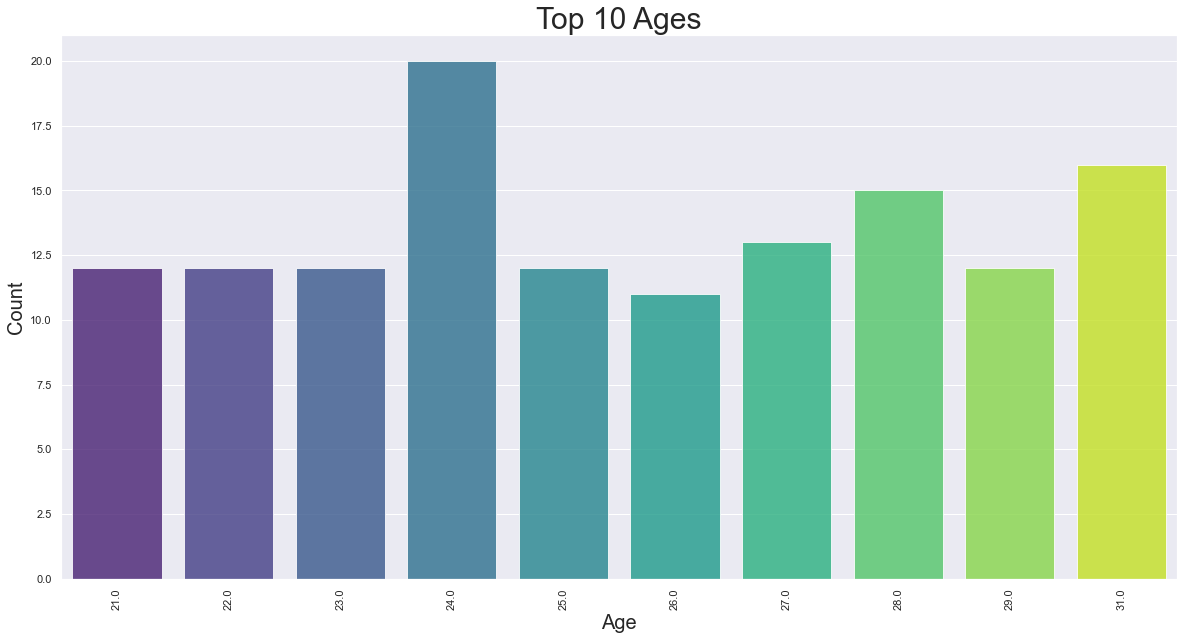

In [43]:
age_count = df['PERSON AGE'].value_counts()
age_count = age_count[:10]
plt.figure(figsize=(20,10))
sns.barplot(age_count.index, age_count.values, alpha = 0.8, saturation = 1, palette = 'viridis')
plt.title('Top 10 Ages', fontsize = 30)
plt.xlabel('Age', fontsize =20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [42]:
df['PERSON AGE'].value_counts()\
                    .head(20)\
                    .to_frame(name = 'Count')\
                    .reset_index()\
                    .style.background_gradient(cmap='Reds', subset= 'Count')

,index,Count
0,24.000000,20
1,31.000000,16
2,28.000000,15
3,27.000000,13
4,25.000000,12
5,29.000000,12
6,23.000000,12
7,21.000000,12
8,22.000000,12
9,26.000000,11
